<a href="https://colab.research.google.com/github/y00628/hip-hop/blob/main/hillary_trump_sentiment_analysis_from_hip_hop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Imports

In [85]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### 2. Data Preprocessing and EDA

In [86]:
# Making sure the file is readable by Pandas

with open('genius_hip_hop_lyrics.csv', 'r', encoding='utf-8', errors='ignore') as file:
    content = file.read()

with open('genius_hip_hop_lyrics_cleaned.csv', 'w', encoding='utf-8') as file:
    file.write(content)

hip_hop = pd.read_csv('genius_hip_hop_lyrics_cleaned.csv')

hip_hop = hip_hop.set_index('id')

hip_hop.head()

,candidate,song,artist,sentiment,theme,album_release_date,line,url
id,,,,,,,,
1,Mike Huckabee,None Shall Pass,Aesop Rock,neutral,NaN,2011,"Wither by the watering hole, Border patrol / W...",http://genius.com/Aesop-rock-none-shall-pass-l...
2,Mike Huckabee,Wellstone,Soul Khan,negative,NaN,2012,Might find the door but never touch the key / ...,http://genius.com/Soul-khan-wellstone-lyrics
3,Jeb Bush,Awe,Dez & Nobs,neutral,NaN,2006,I heard Jeb Bush looking for a (inaudible),http://genius.com/Dez-and-nobs-awe-lyrics
4,Jeb Bush,The Truth,Diabolic,negative,political,2006,What you heard before ain't as big of a lesson...,http://genius.com/Diabolic-the-truth-lyrics
5,Jeb Bush,Money Man,Gorilla Zoe,negative,personal,2007,I'm comin back from Florida / Wit Jeb Bush and...,http://genius.com/Gorilla-zoe-money-man-lyrics


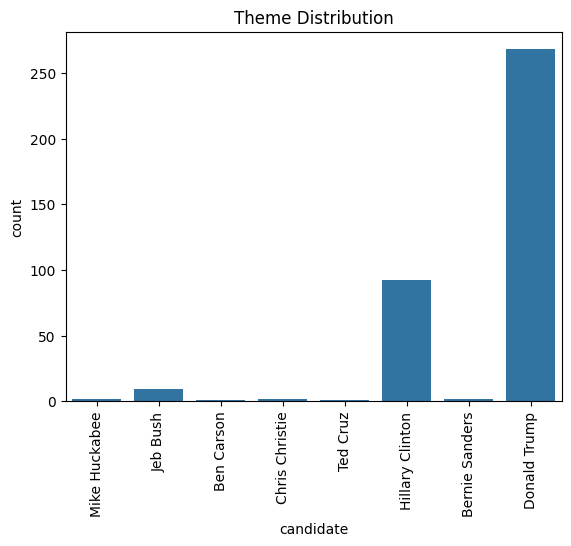

In [87]:
sns.countplot(x='candidate', data=hip_hop)
plt.title('Theme Distribution')
plt.xticks(rotation=90)
plt.show()


In [88]:
hip_hop_subset = hip_hop[['candidate', 'line']]
hip_hop_subset = hip_hop_subset[hip_hop_subset['candidate'].isin(['Donald Trump', 'Hillary Clinton'])]
hip_hop_subset

,candidate,line
id,,
16,Hillary Clinton,"Hillary Clinton ain't gon' like this, she's fa..."
17,Hillary Clinton,Until we really saw the true problem / Even Hi...
18,Hillary Clinton,Would you stay down like Hillary? / Even if yo...
19,Hillary Clinton,Makin me call Lewinski / You fuckin up like Hi...
20,Hillary Clinton,"Hillary said I frighten her / Alarm go off, ch..."
...,...,...
374,Donald Trump,Bitches got bumps and I'm rich just like Donal...
375,Donald Trump,"The world gon' end real soon, especially if Tr..."
376,Donald Trump,I've seen more holes than a golf course on Don...


In [89]:
hip_hop_subset['candidate'].value_counts()

candidate
Donald Trump       268
Hillary Clinton     92
Name: count, dtype: int64

### 3. Text Preprocessing

In [90]:
import nltk
import re

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

from gensim.models import Word2Vec


In [91]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [92]:
def remove_stopwords(tokens):
  stop_words = set(stopwords.words('english'))
  return list(filter(lambda x: x not in stop_words, tokens))

In [93]:
def preprocess_lyrics(lyrics):
  result = re.sub(r'\d+', '', lyrics.lower())
  result = re.sub(r'^[^a-zA-Z0-9]+', '', result)

  tokens = word_tokenize(result)
  stop_words = set(stopwords.words('english'))
  tokens_filtered = list(filter(lambda x: x not in stop_words and x.isalpha(), tokens))

  lemmatizer = WordNetLemmatizer()
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens_filtered]

  return ' '.join(lemmatized_tokens)

In [94]:
hip_hop_subset['lyrics_processed'] = hip_hop_subset['line'].apply(preprocess_lyrics)
hip_hop_subset

,candidate,line,lyrics_processed
id,,,
16,Hillary Clinton,"Hillary Clinton ain't gon' like this, she's fa...",hillary clinton ai gon like fanning next serpent
17,Hillary Clinton,Until we really saw the true problem / Even Hi...,really saw true problem even hilary could rob
18,Hillary Clinton,Would you stay down like Hillary? / Even if yo...,would stay like hillary even thought killin
19,Hillary Clinton,Makin me call Lewinski / You fuckin up like Hi...,makin call lewinski fuckin like hilary
20,Hillary Clinton,"Hillary said I frighten her / Alarm go off, ch...",hillary said frighten alarm go choking teeth w...
...,...,...,...
374,Donald Trump,Bitches got bumps and I'm rich just like Donal...,bitch got bump rich like donald trump
375,Donald Trump,"The world gon' end real soon, especially if Tr...",world gon end real soon especially trump get e...
376,Donald Trump,I've seen more holes than a golf course on Don...,seen hole golf course donald trump course


### 4. Extract most common k words

In [95]:
def get_freq_dist(candidate):
    all_words = []
    for words in hip_hop_subset[hip_hop_subset['candidate'] == candidate]['lyrics_processed']:
        all_words.extend(words.split(' '))

    return FreqDist(all_words)

In [96]:
def most_common_k_words(candidate, k):
  lst_and_frq = get_freq_dist(candidate).most_common(k)
  return [tup[0] for tup in lst_and_frq]

In [97]:
trump_common = most_common_k_words(candidate='Donald Trump', k=15)
trump_common

['trump',
 'donald',
 'like',
 'tower',
 'get',
 'got',
 'money',
 'fuck',
 'n',
 'ai',
 'bitch',
 'fire',
 'call',
 'shit',
 'man']

In [98]:
clinton_common = most_common_k_words(candidate='Hillary Clinton', k=15)
clinton_common

['hillary',
 'clinton',
 'like',
 'bill',
 'hilary',
 'rodham',
 'bitch',
 'obama',
 'fuck',
 'got',
 'gon',
 'even',
 'call',
 'white',
 'ai']

### 5. Extract Sentiment Scores

In [99]:
trump_clinton = hip_hop_subset

In [100]:
def get_sentiment_score(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

In [101]:
analyzer = SentimentIntensityAnalyzer()
trump_clinton['polarity_scores'] = hip_hop_subset['lyrics_processed'].apply(get_sentiment_score)
trump_clinton

,candidate,line,lyrics_processed,polarity_scores
id,,,,
16,Hillary Clinton,"Hillary Clinton ain't gon' like this, she's fa...",hillary clinton ai gon like fanning next serpent,0.3612
17,Hillary Clinton,Until we really saw the true problem / Even Hi...,really saw true problem even hilary could rob,-0.5401
18,Hillary Clinton,Would you stay down like Hillary? / Even if yo...,would stay like hillary even thought killin,0.3612
19,Hillary Clinton,Makin me call Lewinski / You fuckin up like Hi...,makin call lewinski fuckin like hilary,0.3612
20,Hillary Clinton,"Hillary said I frighten her / Alarm go off, ch...",hillary said frighten alarm go choking teeth w...,-0.7783
...,...,...,...,...
374,Donald Trump,Bitches got bumps and I'm rich just like Donal...,bitch got bump rich like donald trump,0.3182
375,Donald Trump,"The world gon' end real soon, especially if Tr...",world gon end real soon especially trump get e...,0.0000
376,Donald Trump,I've seen more holes than a golf course on Don...,seen hole golf course donald trump course,0.0000


In [102]:
trump_clinton_nonzero = trump_clinton[trump_clinton['polarity_scores'] != 0]
trump_clinton_nonzero

,candidate,line,lyrics_processed,polarity_scores
id,,,,
16,Hillary Clinton,"Hillary Clinton ain't gon' like this, she's fa...",hillary clinton ai gon like fanning next serpent,0.3612
17,Hillary Clinton,Until we really saw the true problem / Even Hi...,really saw true problem even hilary could rob,-0.5401
18,Hillary Clinton,Would you stay down like Hillary? / Even if yo...,would stay like hillary even thought killin,0.3612
19,Hillary Clinton,Makin me call Lewinski / You fuckin up like Hi...,makin call lewinski fuckin like hilary,0.3612
20,Hillary Clinton,"Hillary said I frighten her / Alarm go off, ch...",hillary said frighten alarm go choking teeth w...,-0.7783
...,...,...,...,...
368,Donald Trump,It's fuck all you n----s like Trump,fuck n like trump,-0.2500
371,Donald Trump,"Where I stay all they say is Fuck Trump۝, all day",stay say fuck day,-0.5423
373,Donald Trump,Feel like Donald Trump,feel like donald trump,0.3612


In [103]:
trump_clinton_nonzero[['candidate', 'polarity_scores']].groupby('candidate').describe()

polarity_scores                                        \
                          count      mean       std     min       25%   
candidate                                                               
Donald Trump              155.0  0.008965  0.462855 -0.8720 -0.510300   
Hillary Clinton            60.0 -0.050663  0.575941 -0.9371 -0.589275   

                                          
                     50%     75%     max  
candidate                                 
Donald Trump     0.12800  0.3612  0.8020  
Hillary Clinton  0.07715  0.3612  0.9081

### 6. Visualization

#### Histogram

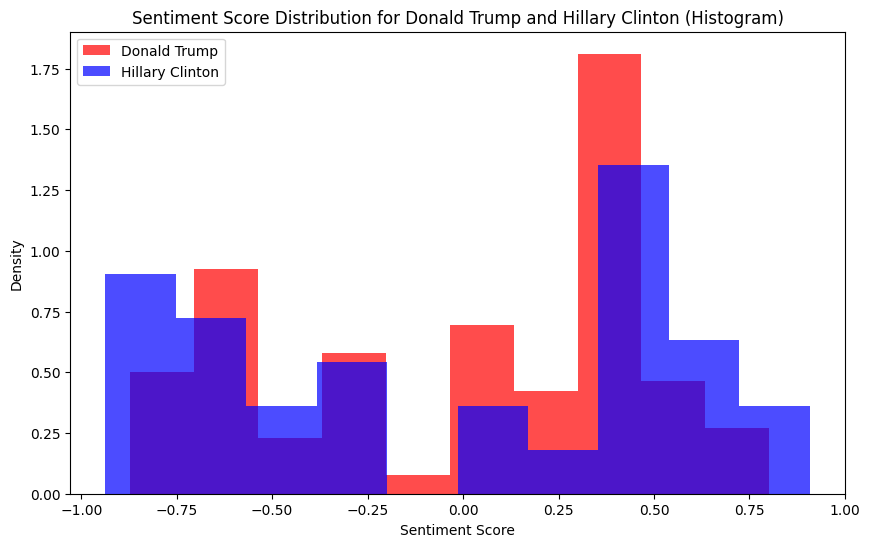

In [104]:
plt.figure(figsize=(10, 6))
trump_scores, clinton_scores = trump_clinton_nonzero[trump_clinton_nonzero['candidate'] == 'Donald Trump']['polarity_scores'], trump_clinton_nonzero[trump_clinton_nonzero['candidate'] == 'Hillary Clinton']['polarity_scores']
plt.hist(trump_scores, label='Donald Trump', color='red', alpha=0.7, density=True)
plt.hist(clinton_scores, label='Hillary Clinton', color='blue', alpha=0.7, density=True)

plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.title('Sentiment Score Distribution for Donald Trump and Hillary Clinton (Histogram)')
plt.legend(loc='upper left')

#### Boxplot

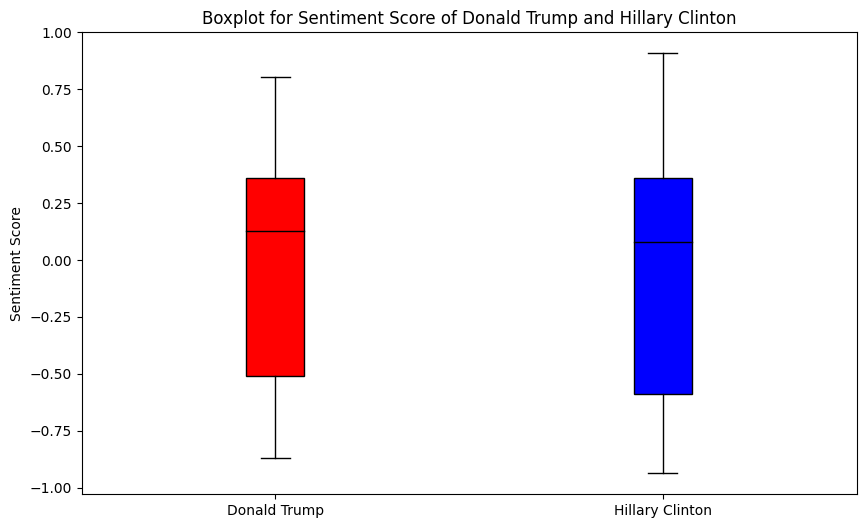

In [105]:
polarity_scores = [trump_scores, clinton_scores]

plt.figure(figsize=(10, 6))
boxplot = plt.boxplot(polarity_scores, patch_artist=True, medianprops=dict(color='black'))

colors = ['red', 'blue']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

plt.xticks([1, 2], ['Donald Trump', 'Hillary Clinton'])

plt.title('Boxplot for Sentiment Score of Donald Trump and Hillary Clinton')
plt.ylabel('Sentiment Score')

# Show plot
plt.show()

Though not statistically significant, hip-hop artists tend to have a more diverse prespective on Hillary Clinton than on Donald Trump. Moreover, hip-hop artists tend to have a slightly more positive opinion about Donald Trump. 